# Process of Exploration
- clean the data
- transformation to data

Contextual information:
- Possible questions to look at
    - Is there a way to predict the success of the movie (monetary, reviews, )
- Reliability of data
    - mentioned that the revenue for Avatar understated the $2 billion global revenue
    - consider details for different version of a film (me - think about the multiple different version of Star Wars: New Hope)
    -[?] check if the information is accurate for a couple of entities

## Data Cleaning 

#### Summary of what needs to be done to clean the data for each feature

##### Credits dataset

| Feature | Action | Description |
| -------- | ------------|-------------|
| movie_id | Dropped Feature | Dropped during data cleaning |
| title | Dropped Feature | Used the title feature from movies dataset |
| cast | ***Transformed | [AN ITERATIVE PROCESS] Currently a list of the cast member names |
| crew | ***Transformed | [AN ITERATIVE PROCESS] Currently a list of the crew member names  |


#### Movies dataset
| Feature | Action | Description |
| -------- | ------------|-------------|
| budget | NA | NA |
| genres | Transformed | A list of genres of the film |
| homepage | ***Dropped | I will not need the 'home page' feature for this iteration stage of the project. When I make a deployed app, it can link to the corresponding website. An issue can be faulty hyperlinks, but that is for later iterations. |
| id | Transformed | Changed data type from int to string |
| keywords | Transformed | A list of keywords of the film |
| original_language | NA | NA |
| original_title |
| overview |
| popularity |
| production_companies |
| production_countries |
| release_date |
| revenue |
| runtime |
| spoken_languages |
| status | Dropped Feature* | removed films that were not 'released' and dropped feature |
| tagline |
| title |
| vote_average |
| vote_count |

data cleaning reminder -- <strong>Data Quality assessment</strong>

| Category | Completion? | Description |
| -------- | ------------|-------------|
| Accuracy | [ ] | Does it reflect reality over time |
| Completeness | [ ] | is the requisite information there |
| Consistency | [ x ] | Data match with other datasets |
| Currency | [ ] | Values up to date |
| Relevancy | [ ] | Relevant to objective |
| Validity | [ ] | Data containing valuable values |
| No duplicates | [ ] | Only one instance of a data point |

Data cleaning (More Detail)

- status
    - questions:
        - How many different values are there for the status feature ---- 3
            - df_merge.status.unique() >>>>array(['Released', 'Post Production', 'Rumored'], dtype=object)
        - should i incorporate 'Post Production' and/or 'Rumoured'? ---- No
    - actions
        - As i want to remove 'Post Production' and 'Rumoured', have dropped the 'status' feature because there is only one unique value.
- ~~original title~~, title(movies) alias title_x ~~and title(credits) alias title_y~~
    - questions
        - What values are the same to the 'title_x' feature
            - A -- different_titles_list = np.where( df_merge.original_title != df_merge.title_x )...df_merge.iloc[different_titles_list]->> **dependent on the original nationality of the film**
        - Is there a difference between title(movies) and title(credits)
            - A -- df_merge.iloc[np.where( df_merge.title_x != df_merge.title_y)] --> **No**
        - How many film names are repeated and what are they
            - A -- df_merge.groupby('title_x').count()...count_measure[count_measure.id >1]['id'] --> 'The Host', 'Batman', 'Out of the Blue' == **3**
    - Actions:
        - Drop 'original_language' and 'title_y': Will currently will focus on just english version of the titles
- original language
- release date
    - actions
        - convert to a datetime datatype
            - df_merge.release_date = [pd.to_datetime(entity,format="%Y-%m-%d") for entity in df_merge.release_date]
- cast
    - Questions:
        - what is the best way to represent the cast members for processing? They already have id numbers so i could use that. If left like that, the feature can be seen as ordinal
        - [FEATURE IMPORTANCE] Are all the cast members relevant?, should i just use the top billed cast members (like top 10, if)
- Crew
    - questions
        - what is the best way to represent the Crew members for processing?
            - possibilities
                - just the director




In [1]:
import os
#string manipulation
## remove
def working_directory():
    """fixed the issue

    Returns:
        str: the location of the ideal directory
    """
    return os.getcwd().replace("\\notebooks","")
os.chdir(working_directory())

In [2]:
from config import RAW_DATA_CREDITS,RAW_DATA_MOVIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter

In [3]:
df_credits = pd.read_csv(RAW_DATA_CREDITS)
df_movies = pd.read_csv(RAW_DATA_MOVIES)

In [4]:
# functions to clean
def format_json_inputs(dataframe):
    """change json inputs into a list datatype

    Args:
        columns (list): _description_
        dataframe (pd.Dataframe): _description_
    """
    json_columns = ["genres","keywords","cast","crew","production_companies","production_countries","spoken_languages"]
    for column in json_columns:
        dataframe[column] = dataframe[column].apply(json.loads)
def get_info_from_dict_list(dataframe):
    #not include
    json_columns = ["genres","keywords","production_companies","production_countries","spoken_languages"]
    for column in json_columns:
        dataframe[column] = dataframe[column].apply(lambda x: [ _['name'] for _ in x])
def clean_status_then_removal(dataframe):
    post_production_index = dataframe[dataframe.status=='Post Production'].index
    rumored_index = dataframe[dataframe.status=='Rumored'].index

    combined_index = post_production_index.append(rumored_index)
    dataframe = dataframe.drop(combined_index,axis=0)
    dataframe = dataframe.drop('status',axis=1)
    return dataframe
def drop_columns(dataframe):
    drop_columns = ["homepage","original_title","title_y"]
    dataframe.drop(drop_columns,axis=1,inplace=True)
def string_to_datetime(dataframe,column):
    dataframe[column] = [pd.to_datetime(entity,format="%Y-%m-%d") for entity in dataframe[column]]

In [5]:
df_credits = pd.read_csv(RAW_DATA_CREDITS)
df_movies = pd.read_csv(RAW_DATA_MOVIES)

#merge datasets
df_merge = pd.merge(df_movies,df_credits,how="left",left_on='id',right_on='movie_id')
format_json_inputs(dataframe=df_merge)
df_merge = clean_status_then_removal(dataframe=df_merge)
get_info_from_dict_list(dataframe=df_merge)
drop_columns(dataframe=df_merge)
string_to_datetime(dataframe=df_merge,column='release_date')
df_merge.id = df_merge.id.apply(lambda x: str(x))
#df_merge.cast = df_merge.cast.apply(lambda x: [i['name'] for i in x]) # just the cast name
#df_merge.crew = df_merge.crew.apply(lambda x: [i['name'] for i in x]) # just the crew names
df_merge = df_merge.drop(['movie_id'],axis=1)

# Exploration

In [8]:
def eda_number_1(dataframe:pd.DataFrame):
    """answers the follwing questions:
        - How many features
        - How many observations
        - What is the datatype of each feature
        - Any listed null values
    Args:
        dataframe (pd.DataFrame): inspect the dataframe
    """
    print(f"The dataframe has {dataframe.shape[0]} columns and \
{dataframe.shape[1]} rows")
    print("****")
    dataframe.info()


In [9]:
eda_number_1(df_merge)

The dataframe has 4795 columns and 19 rows
****
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4795 entries, 0 to 4802
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4795 non-null   int64         
 1   genres                4795 non-null   object        
 2   id                    4795 non-null   object        
 3   keywords              4795 non-null   object        
 4   original_language     4795 non-null   object        
 5   overview              4792 non-null   object        
 6   popularity            4795 non-null   float64       
 7   production_companies  4795 non-null   object        
 8   production_countries  4795 non-null   object        
 9   release_date          4794 non-null   datetime64[ns]
 10  revenue               4795 non-null   int64         
 11  runtime               4793 non-null   float64       
 12  spoken_languages      4795 n

In [8]:
df_merge.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.795000e+03,4795.000000,4.795000e+03,4793.000000,4795.000000,4795.000000
mean,2.909267e+07,21.527415,8.239771e+07,106.915084,6.093306,691.360792
std,4.073962e+07,31.831547,1.629583e+08,22.570343,1.190313,1235.298140
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,4.723880,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.963328,1.925587e+07,104.000000,6.200000,236.000000
75%,4.000000e+07,28.352222,9.311911e+07,118.000000,6.800000,738.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## Univariate Exploration

### budget 

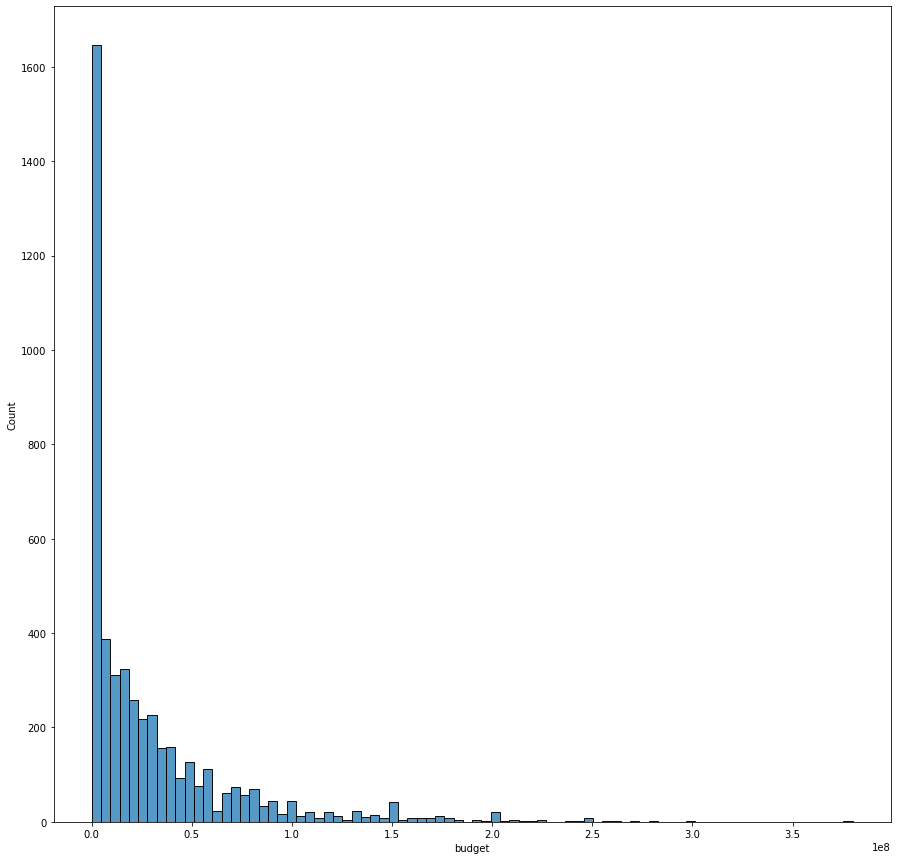

In [18]:
plt.figure(figsize=(15,15))
sns.histplot(df_merge.budget)
plt.show()

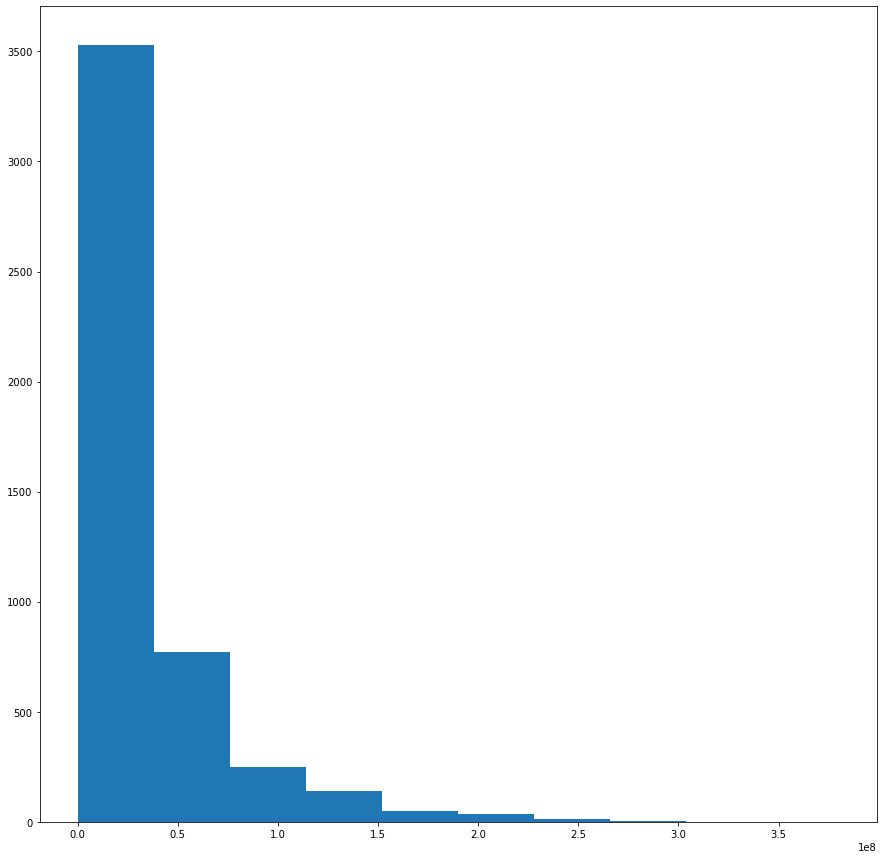

In [19]:
plt.figure(figsize=(15,15))
plt.hist(df_merge.budget,)
plt.show()

In [7]:
df_merge[df_merge.budget == 0].shape[0]

1032

### genres

- questions 
    - what is the variance of the genre
    - what is the central tendency of the genres
- During EDA
    - what are the similarities between genres (example: 'tv movie' is the least popular genre mentioned; is there a genre that is similar to this genre?)
    - what can be used to differentiate further a film 

In [12]:
def countplot(dataframe:pd.DataFrame,column:str):
    """
    tasks:
    - get the values within list for the records
    - sort the values into descending order 
    - create a barchart based on the count of the genre
    """
    values = []
    for _ in dataframe[column]:
        for x in _:
            values.append(x)
    values_sorted = Counter(values)
    genre_order = [_[0] for _ in values_sorted.most_common()]
    sns.set_style("whitegrid")
    plt.figure(figsize=(15,15))
    plt.xticks(rotation=45)
    sns.countplot(x = values,order=genre_order)
    plt.show()

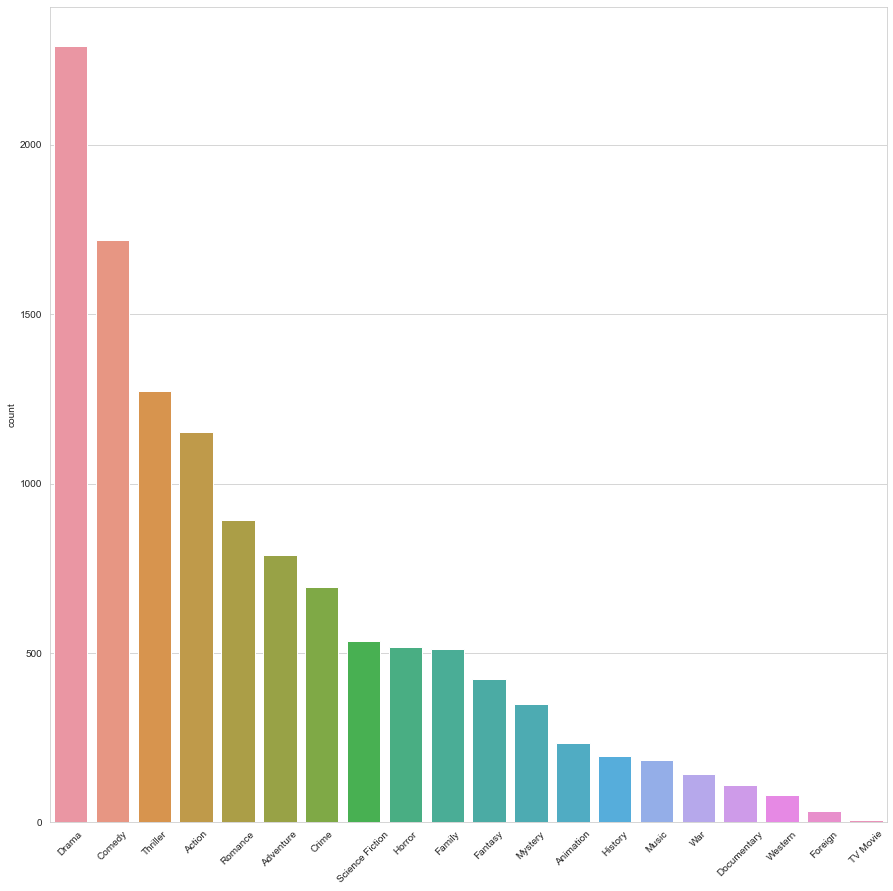

In [15]:
countplot(dataframe=df_merge,column='genres')

### keywords

- questions:
    - can i use the same method as for genre -- no
        - there are 1001 different entities
    - how to best represent the keywords, i.e. group war related films as 'war'
        - possible ways:
            - keep how it is and make the tags features
            - manually group related keywords -- no: there are 9806 unique keywords
            - auto

In [39]:
# to check how many unique values there are 
def unique_keywords():
    values_list = []
    for _ in df_merge['keywords']:
        for x in _:
            values_list.append(x)
    values_set = set(values_list)
    return (len(values_list),len(values_set))

In [40]:
unique_keywords()

(36160, 9806)

### original_language

- questions
    - what is the variation of original_language
        - mainly English

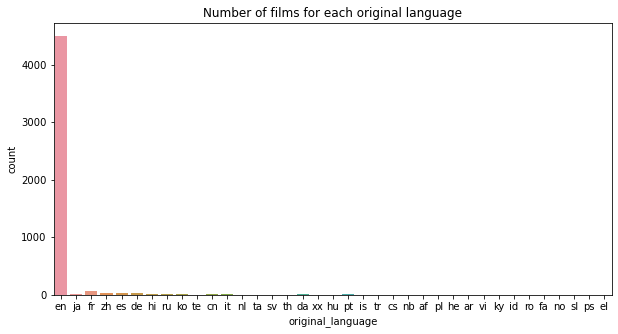

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='original_language',data=df_merge)
plt.title(label='Number of films for each original language')
plt.show()

### overview

### popularity

### production_companies

### production_countries

### release_date

### revenue

### runtime

### spoken_languages

### tagline

### title_x

### vote_average

### vote_count

### movie_id

### cast

### crew